خضر حسون

السنة الرابعة

شبكات ونظم تشغيل

Lab 5 - Audio Compression

In [2]:
import soundfile as sf
import numpy as np
from numpy.fft import fftshift,fft,ifft
import matplotlib.pyplot as plt


def my_encoder(X):
    i = 0
    Y = [] #The vector of nonzero values.
    Pos = [] #Positions and lengths of zero strings.
    temp_Pos = 1 #The current position (index).
    count = 0 #The temporary number of zeros in current string.
    c = 1 #Equlas 0 when a string of zeros found, equlas 1 otherwise.
    for e in X: #Scanning the input vector.
       if e!= 0: #When the current value is not zero.
           Y.append(e) #Add the current value to the nonzero vector.
           if c == 0: #If the previous value was the end of a zero string.
               Pos = Pos + [ temp_Pos, count] #Add the position and length of this string of zeros.

               c = 1 #The current value is nonzero.
               count = 0 #Reset the zeros counter.
       elif (e == 0): #When the current value is zero.
                if (c == 1): #When the previous value is nonzero. If c = 0 so the previous value is 0 and there is no need to save the index of the current zero.
                    temp_Pos = i #This is the first zero in the string so we save its index.

                count = count + 1 #Increase the number of zero.
                c = 0 #We are on a string of zeros;
       i +=1

    return Y, Pos

2 - let's print the sample rate ⚙

In [18]:
audio_data, sample_rate = sf.read('violin.wav')
print(f"the stupid sample rate is :",sample_rate , " 🙄")

the stupid sample rate is : 44100  🙄


3. plot the audio signal using plt.plot function.

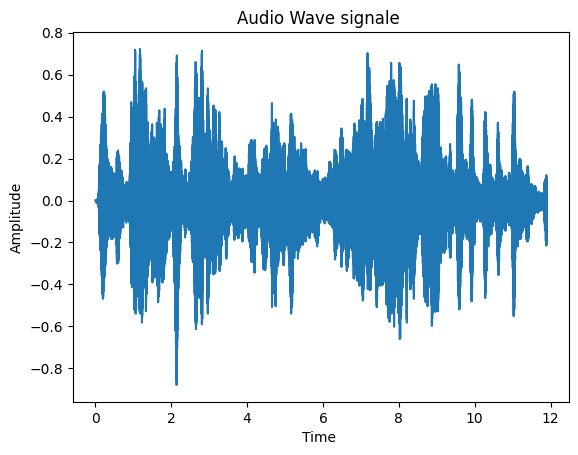

In [7]:
duration = len(audio_data) / sample_rate

# Create a time axis for the waveform
time = 1 / sample_rate * len(audio_data)
time_axis = np.linspace(0, duration, len(audio_data))

# Plot the waveform
plt.plot(time_axis, audio_data)
plt.xlabel('Time ')
plt.ylabel('Amplitude')
plt.title('Audio Wave signale ')
plt.show()

4. Inspect the PSD of this signal using plt.specgram function

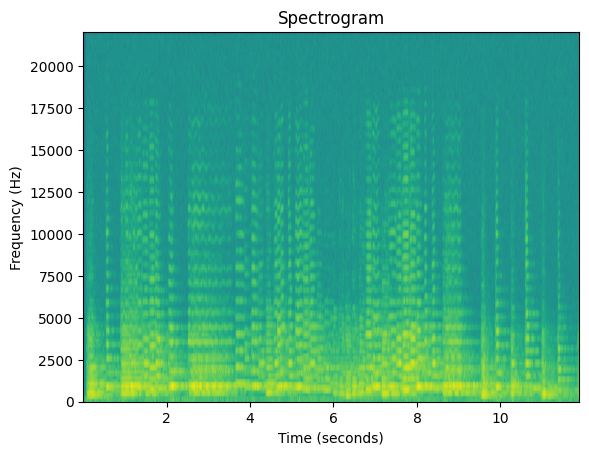

In [9]:
plt.specgram(audio_data, Fs=sample_rate, mode='psd')

plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram')
plt.show()

**المخطط الطيفي هو تمثيل مرئي لتوزيع الترددات في الإشارة الصوتية. كلما كان اللون أكثر سطوعًا في المخطط، زادت شدة الإشارة في ذلك التردد. وكلما كان اللون أكثر قتامة، قلّت شدة الإشارة في ذلك التردد.
**





6. Transform the audio signal to frequency domain using fft function.

In [10]:
fft(audio_data)

array([-2050.54296875+0.j        ,    -4.24088079+0.98172736j,
          -3.95850823-0.13992858j, ...,    -4.14928015-2.05415683j,
          -3.95850823+0.13992858j,    -4.24088079-0.98172736j])

7. Plot audio FFT using plt.plot (hint: use np.abs and fftshift).

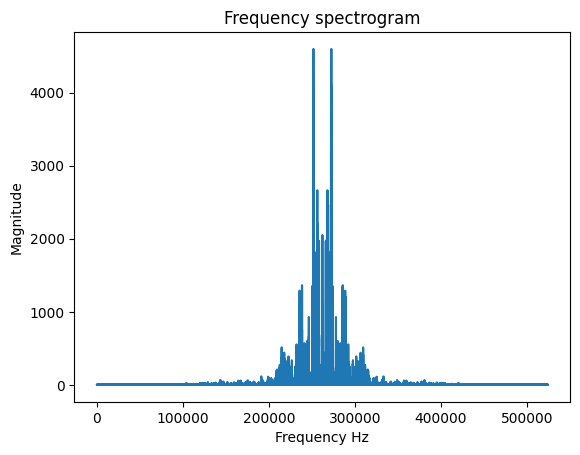

In [11]:
fft_data = np.abs(fftshift(fft(audio_data)))

plt.plot(fft_data)
plt.xlabel('Frequency Hz')
plt.ylabel('Magnitude')
plt.title('Frequency spectrogram')
plt.show()

8. Eliminate (Set to zero) all frequencies in audio FFT with coefficients of magnitude below
a certain value. (Let it be 5% of coefficients maximum magnitude for now)

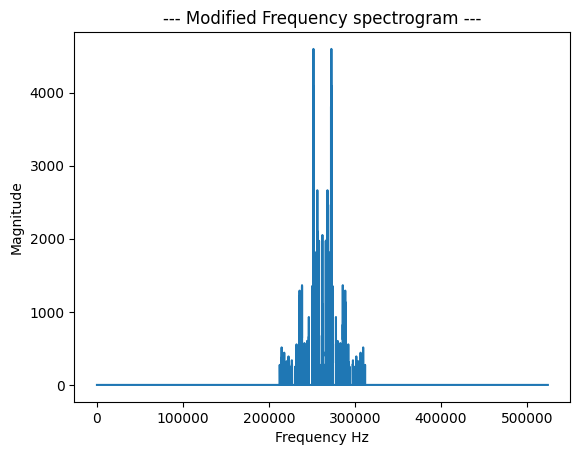

In [12]:
fft_data_modified = fft_data.copy()

threshold = 0.05 * np.max(fft_data_modified)
fft_data_modified[fft_data_modified < threshold] = 0

plt.plot(fft_data_modified)
plt.xlabel('Frequency Hz')
plt.ylabel('Magnitude')
plt.title('--- Modified Frequency spectrogram ---')
plt.show()

9. Reverse Fourier transformtion using ifft.

In [13]:
ifft(fft_data_modified)

array([ 7.92784977+0.00000000e+00j, -7.79469557+7.56231015e-18j,
        7.41134777-1.92445886e-17j, ..., -6.82267835+2.81892565e-17j,
        7.41134777+4.11996826e-18j, -7.79469557+1.73472348e-18j])

10.Notice the ifft results are still in Complex format to fix this use np.real_if_close function
to convert complex numbers to real

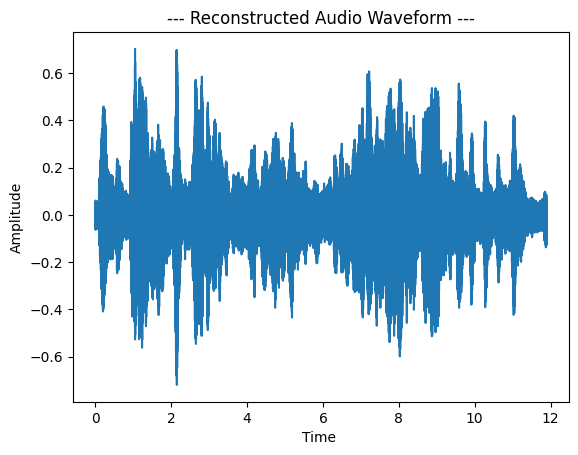

In [14]:
fft_data_modified = fft(audio_data)
threshold = 0.05 * np.max(np.abs(fft_data_modified))
fft_data_modified[np.abs(fft_data_modified) < threshold] = 0

modified_audio_data = np.fft.ifft(fft_data_modified)
modified_audio_data = np.real_if_close(modified_audio_data)

plt.plot(time_axis, modified_audio_data)
plt.xlabel('Time ')
plt.ylabel('Amplitude')
plt.title('--- Reconstructed Audio Waveform ---')
plt.show()

11.Plot the spectrograms of the original and modified signals. Observe the difference in
energy. (you can use plt.subplot to create subplots)

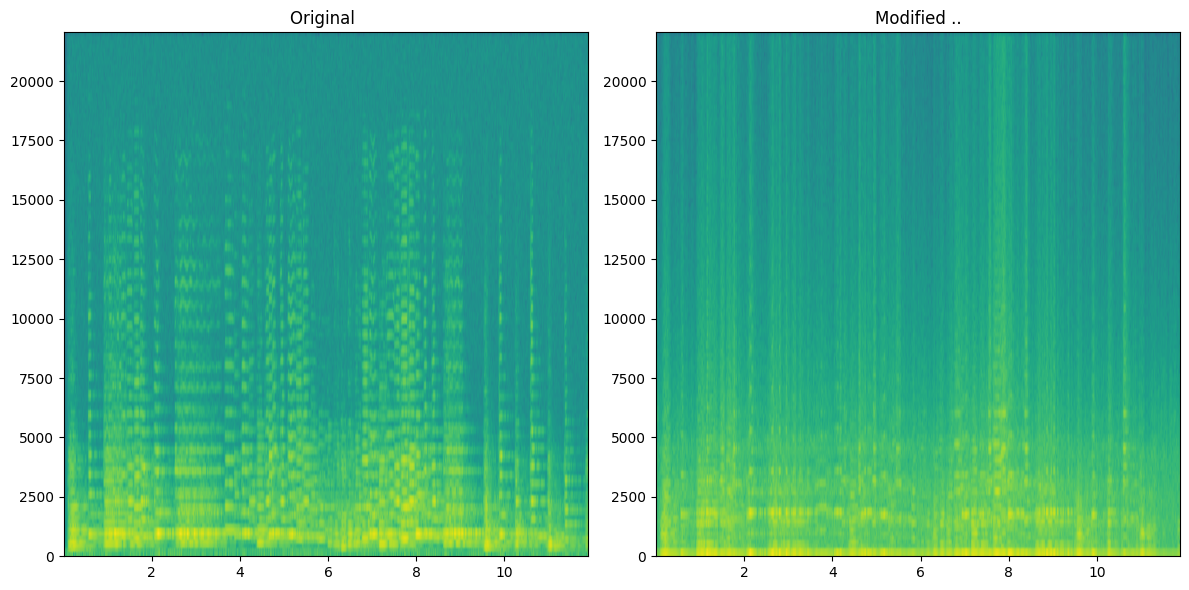

In [15]:
modified_audio_data = np.abs(modified_audio_data)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].specgram(audio_data, Fs=sample_rate, mode='psd')
axs[0].set_title('Original ')

axs[1].specgram(modified_audio_data, Fs=sample_rate, mode='psd')
axs[1].set_title('Modified ..')

plt.tight_layout()
plt.show()

 يمكن ملاحظة اختلاف في الطاقة، حيث أن المخطط الطيفي المعدل قد قلل من الطاقة عند ترددات أقل من العتبة، بسبب إزالة الترددات الموجودة تحت العتبة.

12.Write the modified signal into a wav file using sf.write function.

In [17]:
sf.write('new_stupid_file.wav', modified_audio_data, sample_rate)

13.Listen to the modified audio and compare it to the original one. Write your notes.

I wish I hadn't do it  .

------------------------------------------------------------------
------------------------------------------------------------------

**Part 2**

14. Compress the audio signal for different threshold values between 1% - 10% of the
maximum magnitude. For each threshold value:


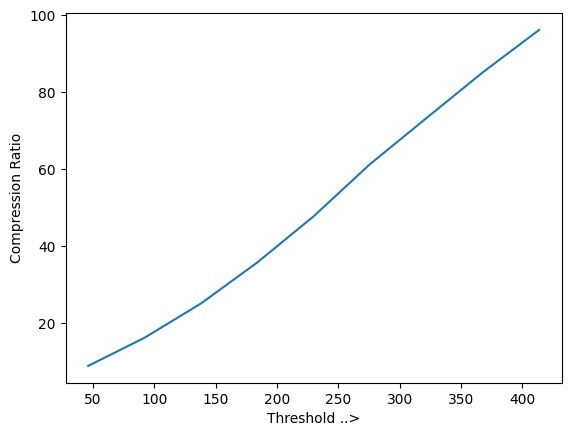

In [25]:
# np.arange(0.01, 0.11, 0.01) creates an array of ten values
# starting at 0.01 and ending at 0.1 increasing by 0.01 each time

array = np.arange(0.01, 0.1, 0.01) * np.max(np.abs(fft_data))
compression_ratios = []

for threshold in array:
    fft_data_modified = fft_data.copy()
    fft_data_modified[np.abs(fft_data_modified) < threshold] = 0
    Y, Pos = my_encoder(fft_data_modified)


    compression_ratio = len(audio_data) / (len(Y) + len(Pos))
    compression_ratios.append(compression_ratio)

plt.plot(array, compression_ratios)
plt.xlabel('Threshold ..>')
plt.ylabel('Compression Ratio')
plt.show()

------------------------------------------------------
---------------------------------------------------------


🥰🥰

